In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [56]:
df=pd.read_csv(r"C:\Users\Vedant Maladkar\Downloads\ecommerce_furniture_dataset_2024.csv")
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [57]:
if 'originalPrice' in df.columns:
    df = df.drop(columns=['originalPrice'])


In [58]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Vedant Maladkar\AppData\Local\Temp\ipykernel_29580\2337335738.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [59]:
df['Sales'] = df['sold'].apply(lambda x: 1 if x > 50 else 0)


In [60]:
df['Shipping'] = df['tagText'].apply(lambda x: 1 if 'Free' in str(x) else 0)

In [61]:
df = df.dropna(subset=['tagText'])

In [62]:
df[df.isnull().any(axis=1)]

,productTitle,price,sold,tagText,Sales,Shipping


In [63]:
df.head()

,productTitle,price,sold,tagText,Sales,Shipping
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping,1,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping,0,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping,0,1


In [64]:
x=df[['price', 'Shipping']]
y=df['Sales']

In [65]:
scalar=StandardScaler()
df[['price', 'Shipping']]=scalar.fit_transform(df[['price', 'Shipping']])

In [66]:
X = df[['price', 'Shipping']]
X = sm.add_constant(x)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    feature        VIF
0     const  17.123073
1     price   1.027422
2  Shipping   1.027422


In [67]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [69]:
accuracy_score(y_test, y_pred)

0.725

In [70]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[269, 109],
       [  1,  21]])

In [71]:
print(classification_report(y_test, y_pred, target_names=['Not High', 'High']))

              precision    recall  f1-score   support

    Not High       1.00      0.71      0.83       378
        High       0.16      0.95      0.28        22

    accuracy                           0.72       400
   macro avg       0.58      0.83      0.55       400
weighted avg       0.95      0.72      0.80       400



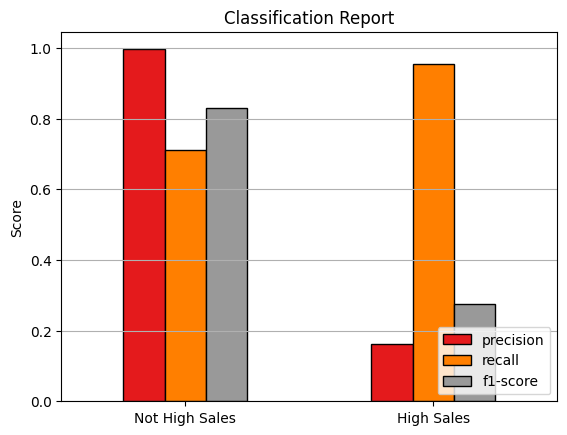

In [72]:
labels = ['Not High Sales', 'High Sales']

report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

me_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score']].iloc[:2]

me_df.plot(kind='bar', colormap='Set1', edgecolor='black')
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')